<a href="https://colab.research.google.com/github/inesnft/Athlete-Performance-Prediction/blob/main/Projet_AAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook essaie


In [2]:
import pandas as pd
from pathlib import Path
import urllib.request

def load_football_data(filename: str = "Euro-Football_2012-2023.csv") -> pd.DataFrame:

    # Chemins et URL
    DATASETS_PATH = Path("datasets")
    CSV_FILE_PATH = DATASETS_PATH / filename # Le chemin local pour le fichier CSV

    # L'URL RAW (Brute) pointant vers le nouveau fichier CSV sur GitHub

    URL_GITHUB_CSV = (
        "https://raw.githubusercontent.com/inesnft/Athlete-Performance-Prediction/main/Euro-Football_2012-2023.csv"
    )

    # 1. Vérification et téléchargement
    if not CSV_FILE_PATH.is_file():
        # Crée le répertoire 'datasets' si nécessaire
        DATASETS_PATH.mkdir(parents=True, exist_ok=True)

        print(f"Téléchargement de {filename} depuis GitHub...")
        # Téléchargement du fichier CSV
        urllib.request.urlretrieve(URL_GITHUB_CSV, CSV_FILE_PATH)
        print("Téléchargement terminé.")

    # 2. Chargement des données CSV
    try:
        # pd.read_csv lit le fichier téléchargé localement
        data_frame = pd.read_csv(CSV_FILE_PATH, sep=';')
        return data_frame
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier CSV : {e}")
        return pd.DataFrame()

football_data = load_football_data()

# Vérification
if not football_data.empty:
    print("DataFrame 'football_data' chargé à partir du CSV.")
football_data.head()

Téléchargement de Euro-Football_2012-2023.csv depuis GitHub...
Téléchargement terminé.
DataFrame 'football_data' chargé à partir du CSV.


,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,2,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,3,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,4,England,Premier League,E0,2012-2013,2012-08-18 00:00:00,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [ ]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66147 entries, 0 to 66146
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        66147 non-null  int64  
 1   Country   66147 non-null  object 
 2   League    66147 non-null  object 
 3   Div       66121 non-null  object 
 4   Season    66147 non-null  object 
 5   Date      66121 non-null  object 
 6   HomeTeam  66121 non-null  object 
 7   AwayTeam  66121 non-null  object 
 8   Referee   13620 non-null  object 
 9   FTHG      66119 non-null  float64
 10  FTAG      66119 non-null  float64
 11  FTR       66119 non-null  object 
 12  HTHG      66030 non-null  float64
 13  HTAG      66030 non-null  float64
 14  HTR       66030 non-null  object 
 15  HS        50116 non-null  float64
 16  AS        50116 non-null  float64
 17  HST       50116 non-null  float64
 18  AST       50116 non-null  float64
 19  HF        48778 non-null  float64
 20  AF        48778 non-null  fl

In [ ]:
football_data["Country"].value_counts()

,count
Country,
England,10748
Spain,9676
Italy,9193
France,8504
Germany,7028
Scotland,4556
Turkey,3763
Netherlands,3437
Portugal,3372


In [5]:
nombre_equipes_differentes = pd.concat([football_data['HomeTeam'], football_data['AwayTeam']]).nunique()
print(f"Nombre total d'équipes différentes dans le jeu d'entraînement : {nombre_equipes_differentes}")

Nombre total d'équipes différentes dans le jeu d'entraînement : 488


In [ ]:
football_data["Country"].value_counts()

,count
Country,
England,10748
Spain,9676
Italy,9193
France,8504
Germany,7028
Scotland,4556
Turkey,3763
Netherlands,3437
Portugal,3372


In [ ]:
nombre_match=football_data["Country"].value_counts()
nombre_match_sorted = nombre_match.sort_values(ascending=True)
print(nombre_match_sorted)

Country
Greece          2880
Belgium         2990
Portugal        3372
Netherlands     3437
Turkey          3763
Scotland        4556
Germany         7028
France          8504
Italy           9193
Spain           9676
England        10748
Name: count, dtype: int64


In [ ]:
nombre_match_equipe_home=football_data["HomeTeam"].value_counts()
nombre_match_equipe_away= football_data["AwayTeam"].value_counts()
total_nombre_match_equipe = pd.concat([nombre_match_equipe_home, nombre_match_equipe_away])
print(total_nombre_match_equipe)


Birmingham       266
Middlesbrough    261
Nott'm Forest    259
Huddersfield     258
Cardiff          258
                ... 
Elversberg         9
Samsunspor         9
Almere City        8
Estrela            7
Kifisias           6
Name: count, Length: 976, dtype: int64


In [ ]:
total_nombre_match_equipe_sorted = total_nombre_match_equipe.sort_values(ascending=True).reset_index()
# tjr penser à mettre rest_index pour le convertir en histogramme après
total_nombre_match_equipe_sorted.head(100)

,index,count
0,Panserraikos,6
1,Kifisias,6
2,Estrela,7
3,Elversberg,8
4,Almere City,8
...,...,...
95,Milton Keynes Dons,23
96,Casa Pia,24
97,Volendam,24
98,Farense,24


On voit que y'a des equipe qui ont joué très peu de match: on pourrait les éliminé??


/tmp/ipython-input-2462822558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


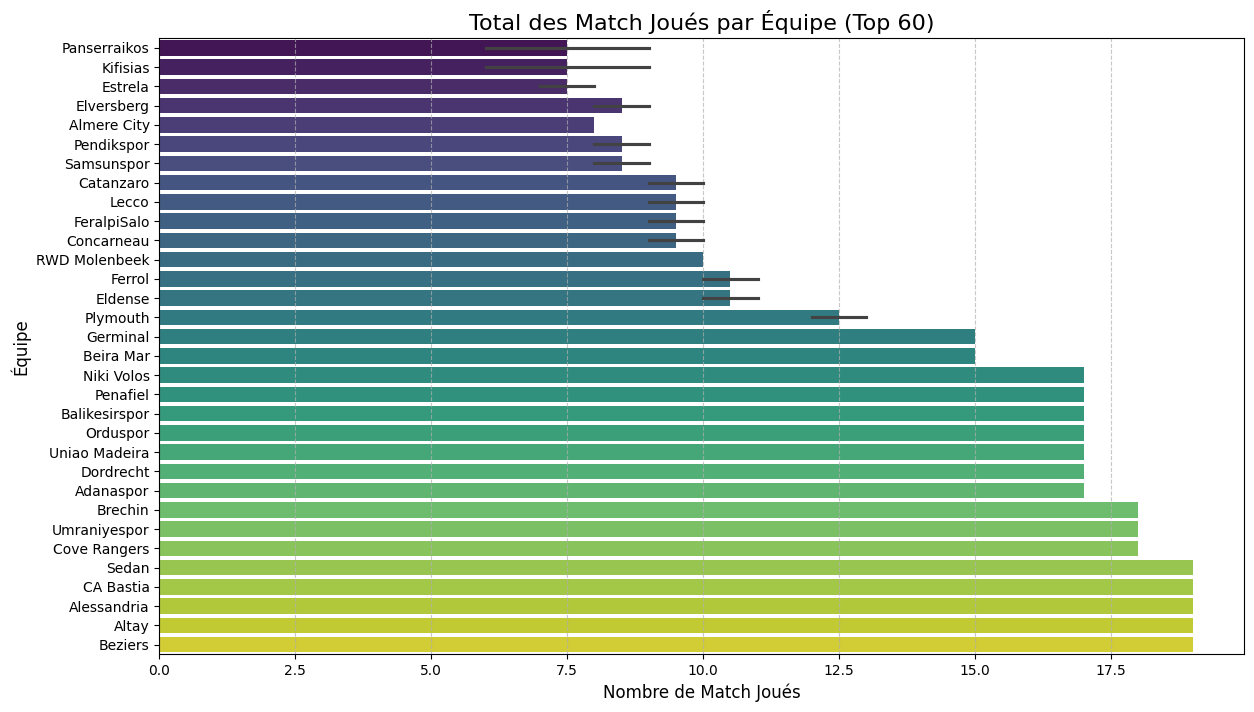

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Choix du nombre d'équipes à afficher pour que le graphique soit lisible
TOP_N = 60 # Affiche le top 30 des équipes

plt.figure(figsize=(14, 8))
sns.barplot(
    x='count',
    y='index',
    data=total_nombre_match_equipe_sorted.head(TOP_N),
    palette='viridis' # Une palette de couleurs
)

plt.title(f'Total des Match Joués par Équipe (Top {TOP_N})', fontsize=16)
plt.xlabel('Nombre de Match Joués', fontsize=12)
plt.ylabel('Équipe', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "histo"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

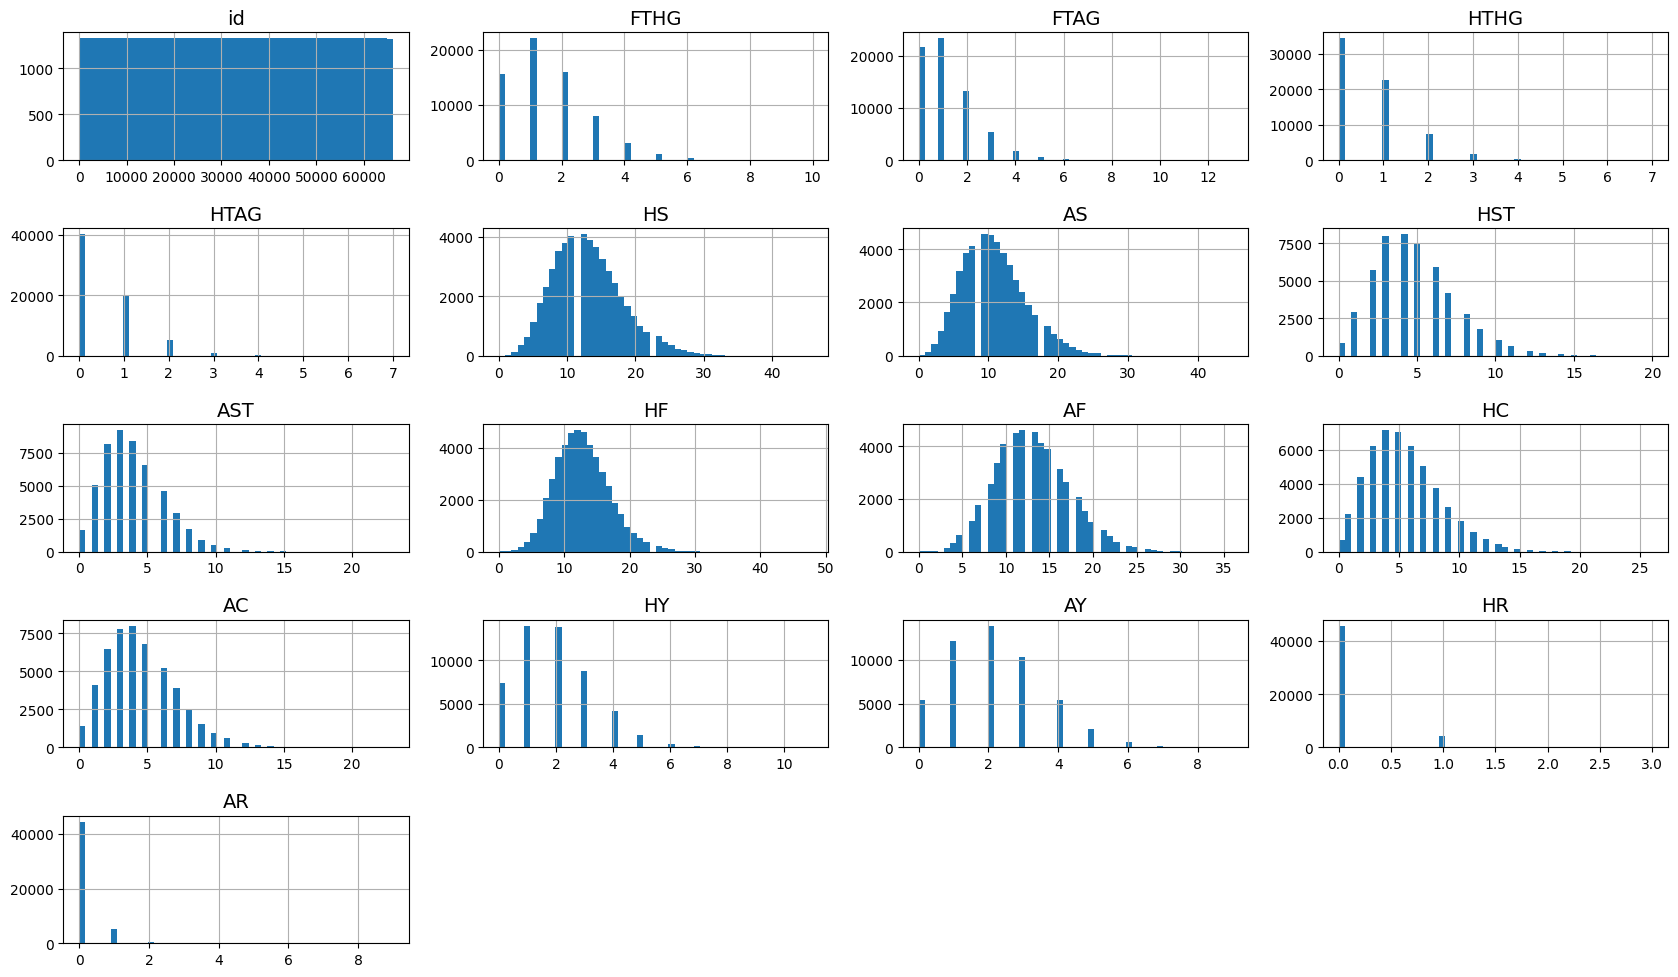

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

football_data.hist(bins=50, figsize=(17, 10))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Souvent plus esthétique que matplotlib seul


# --- 1. Agrégation des buts à domicile (FTHG) ---
goals_home = football_data.groupby('HomeTeam')['FTHG'].sum().reset_index() # rest index permet de transformer les équipes en chiffres
goals_home.columns = ['Team', 'TotalGoals']

# --- 2. Agrégation des buts à l'extérieur (FTAG) ---
goals_away = football_data.groupby('AwayTeam')['FTAG'].sum().reset_index()
goals_away.columns = ['Team', 'TotalGoals']

# --- 3. Combinaison des résultats ---
# On fusionne les deux DataFrames sur la colonne 'Team' et on fait la somme des buts totaux.
total_goals = pd.concat([goals_home, goals_away])
total_goals_by_team = total_goals.groupby('Team')['TotalGoals'].sum().reset_index()

# Renommage des colonnes pour la clarté
total_goals_by_team.columns = ['Team', 'Goals']

# Trier les équipes par nombre de buts total pour la visualisation
total_goals_sorted = total_goals_by_team.sort_values(by='Goals', ascending=False)

print("Top 10 des équipes par Buts Totaux :")
print(total_goals_sorted.head(10))

Top 10 des équipes par Buts Totaux :
              Team   Goals
50       Barcelona  1085.0
55   Bayern Munich  1058.0
101         Celtic  1050.0
374    Real Madrid  1029.0
283       Man City  1026.0
346       Paris SG  1016.0
10            Ajax   978.0
335  PSV Eindhoven   955.0
267      Liverpool   899.0
60         Benfica   892.0


/tmp/ipython-input-2922325789.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


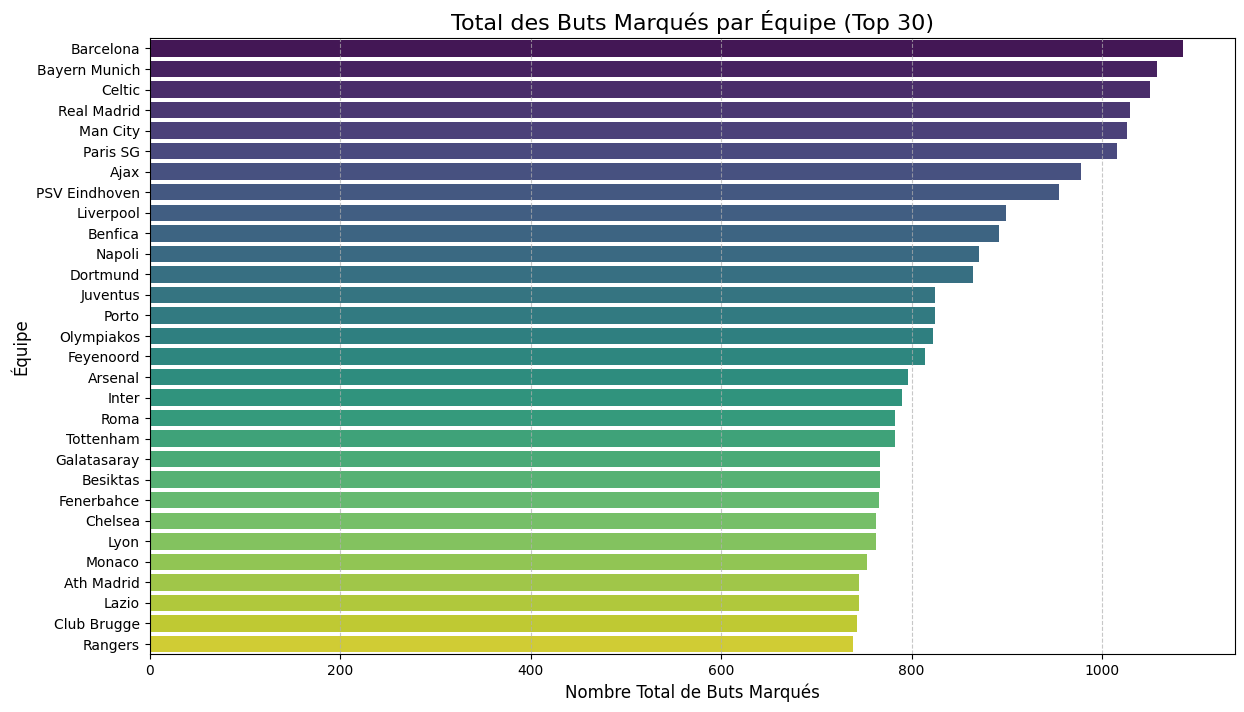

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Choix du nombre d'équipes à afficher pour que le graphique soit lisible
TOP_N = 30 # Affiche le top 30 des équipes

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Goals',
    y='Team',
    data=total_goals_sorted.head(TOP_N),
    palette='viridis' # Une palette de couleurs
)

plt.title(f'Total des Buts Marqués par Équipe (Top {TOP_N})', fontsize=16)
plt.xlabel('Nombre Total de Buts Marqués', fontsize=12)
plt.ylabel('Équipe', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Création d'un test set
Prenons un test set random (sans stratifiaction)


À partir de là, ne plus que utiliser train_set





In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = football_data.copy() # Faire une copie pour éviter les modifications inattendues sur l'original

# Taux de données à mettre dans le jeu de test (20%)
TEST_RATIO = 0.2
# Clé pour la reproductibilité : assure que le même split est généré à chaque exécution
RANDOM_SEED = 42

# Création du jeu d'entraînement et du jeu de test
train_set, test_set = train_test_split(
    data,
    test_size=TEST_RATIO,
    random_state=RANDOM_SEED
)

print(f"Taille totale du jeu de données: {len(data)} matchs")
print(f"Taille du jeu d'entraînement (80%): {len(train_set)} matchs")
print(f"Taille du jeu de test (20%): {len(test_set)} matchs")

# Vous pouvez vérifier le jeu de test:
# print(test_set.head())

Taille totale du jeu de données: 66147 matchs
Taille du jeu d'entraînement (80%): 52917 matchs
Taille du jeu de test (20%): 13230 matchs


 **Création d'une colonne avec les buts totaux (ce que l'on veut prédire)**

In [ ]:
train_data = train_set.copy()

# Convertir les colonnes de buts en type numérique (entier) au cas où elles seraient encore 'object'
# Le paramètre errors='coerce' mettra NaN si la conversion échoue (utile pour le nettoyage)
for col in ['FTHG', 'FTAG', 'HTHG', 'HTAG']:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').fillna(0).astype(int)

# Créer la variable cible : Total de Buts dans le match (Full Time Total Goals)
train_data['FTTG'] = train_data['FTHG'] + train_data['FTAG']

# Maintenant, la colonne 'FTTG' est votre objectif de prédiction

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = train_data.select_dtypes(include=['number']).corr()

# Afficher les corrélations avec la variable cible 'FTTG'
print("--- Corrélation avec les Buts Totaux (FTTG) ---")
print(corr_matrix["FTTG"].sort_values(ascending=False))

--- Corrélation avec les Buts Totaux (FTTG) ---
FTTG    1.000000
FTHG    0.728814
FTAG    0.644652
HTHG    0.505449
HTAG    0.451183
HST     0.378124
AST     0.328538
HS      0.166258
AS      0.146061
id      0.022625
HR      0.019548
AR      0.011288
AC     -0.006529
HC     -0.010158
AY     -0.037199
HY     -0.037306
HF     -0.076217
AF     -0.082070
Name: FTTG, dtype: float64


Histogrammes des corrélations

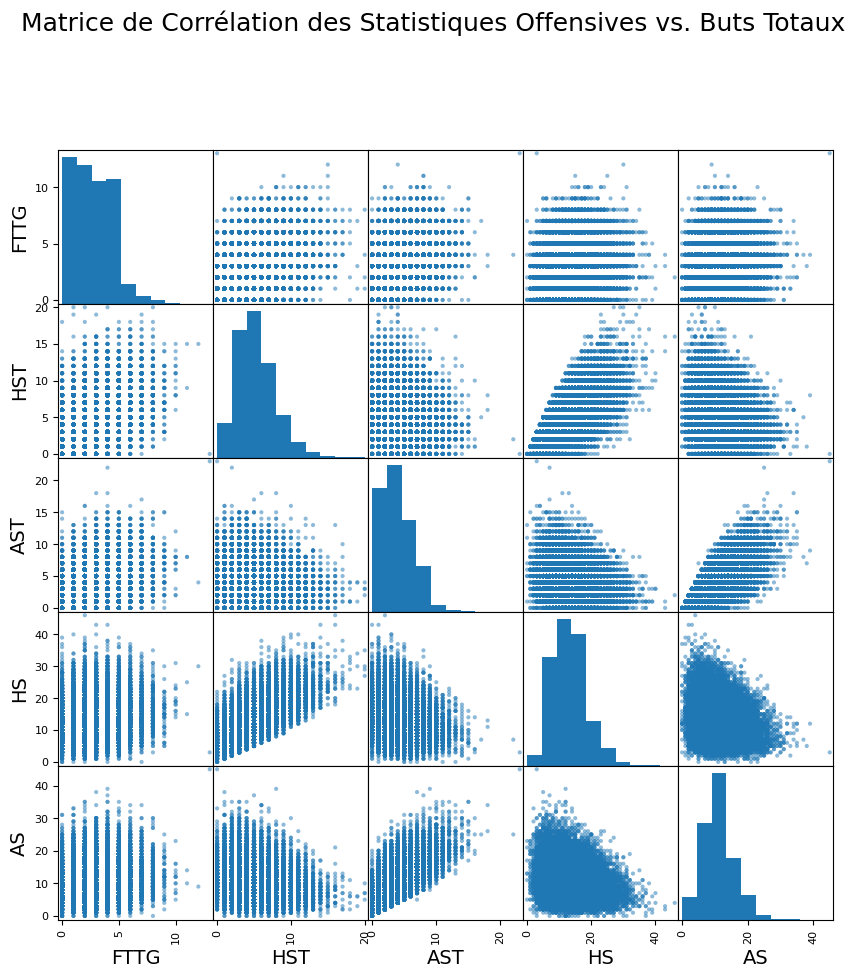

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Sélection des attributs les plus pertinents pour la prédiction des buts, plus la cible (FTTG)
attributes = [
    "FTTG",
    "HST",   # Tirs cadrés à domicile (la meilleure corrélation)
    "AST",   # Tirs cadrés à l'extérieur
    "HS",    # Tirs totaux à domicile
    "AS"     # Tirs totaux à l'extérieur
]

# Tracer la matrice de dispersion (Scatter Matrix)
# Le graphique est centré sur le jeu d'entraînement.
scatter_matrix(train_data[attributes], figsize=(10, 10))
plt.suptitle('Matrice de Corrélation des Statistiques Offensives vs. Buts Totaux', y=1.02, fontsize=18)
plt.show()

Prochaine chose à faire : histogramme avec les équipe (1 à 1000) en fonction du nombre de but.

Le but, regarder le plus de correlations possible dans le dataset pour pouvoir le nettoyer au mieux.

*À faire:*
*   Clean the dataset: get rid of missing value
*   Convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder

À propos de l'encoding:

On a 488 équipe dans notre base de donnée : le One-Hot Encoding créera 488 nouvelles colonnes pour l'équipe à domicile (HomeTeam) et 488 autres colonnes pour l'équipe à l'extérieur (AwayTeam), soit près de 1000 colonnes juste pour les noms d'équipes.Et on ajoute à cela les colonnes pour Country et League: la dimensionnalité globale explose.

Donc ce qu'il faut faire c'est avant cela crée une sorte de valeure pour chaque équipe pour calculer sa force (grace au buts ect):

*Gemini: Ensuite, pour chaque match dans votre jeu de données, vous remplacez le nom de l'équipe par sa performance moyenne correspondante. Vous passez ainsi de 488 colonnes d'encodage binaire à seulement 4 colonnes numériques très informatives !*

**Prochaine étape:**  commencer l'étape d'Ingénierie de Fonctionnalités en créant ces statistiques de performance moyennes sur votre train_set. C'est le meilleur moyen de prédire les buts !

